In [38]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os
import math
import matplotlib.pyplot as plt
import numpy as np

In [39]:
dfs = []
for name in os.listdir('./player_game_logs'):
    dfs.append(pd.read_csv(f"./player_game_logs/{name}/{name}_SUMMARY.csv"))
combined_df = pd.concat(dfs, ignore_index=True).set_index('model_type')

In [40]:
summary_df = combined_df.groupby(combined_df.index).mean()
pd.options.display.float_format = '{:,.4f}'.format
pd.set_option('display.max_columns', None)

In [41]:
summary_df.sort_values('r2_test', ascending=False)

,n_train,n_test,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test,y_test_mean,bias,Game of season_weight,Game for player_weight,Age (days)_weight,Home?_weight,Game Started?_weight,Year_weight,Month of Season_weight,Team_GSW_weight,Opponent_GSW_weight,Team_DET_weight,Opponent_DET_weight,Team_WSB_weight,Opponent_WSB_weight,Team_LAC_weight,Opponent_LAC_weight,Team_DAL_weight,Opponent_DAL_weight,Team_BOS_weight,Opponent_BOS_weight,Team_MEM_weight,Opponent_MEM_weight,Team_UTA_weight,Opponent_UTA_weight,Team_MIN_weight,Opponent_MIN_weight,Team_NJN_weight,Opponent_NJN_weight,Team_TOR_weight,Opponent_TOR_weight,Team_BRK_weight,Opponent_BRK_weight,Team_DEN_weight,Opponent_DEN_weight,Team_WAS_weight,Opponent_WAS_weight,Team_PHI_weight,Opponent_PHI_weight,Team_POR_weight,Opponent_POR_weight,Team_IND_weight,Opponent_IND_weight,Team_MIL_weight,Opponent_MIL_weight,Team_SAC_weight,Opponent_SAC_weight,Team_ATL_weight,Opponent_ATL_weight,Team_ORL_weight,Opponent_ORL_weight,Team_VAN_weight,Opponent_VAN_weight,Team_OKC_weight,Opponent_OKC_weight,Team_LAL_weight,Opponent_LAL_weight,Team_SDC_weight,Opponent_SDC_weight,Team_NOH_weight,Opponent_NOH_weight,Team_NYK_weight,Opponent_NYK_weight,Team_CHH_weight,Opponent_CHH_weight,Team_SEA_weight,Opponent_SEA_weight,Team_NOP_weight,Opponent_NOP_weight,Team_NOK_weight,Opponent_NOK_weight,Team_PHO_weight,Opponent_PHO_weight,Team_CHA_weight,Opponent_CHA_weight,Team_MIA_weight,Opponent_MIA_weight,Team_CLE_weight,Opponent_CLE_weight,Team_CHO_weight,Opponent_CHO_weight,Team_CHI_weight,Opponent_CHI_weight,Team_SAS_weight,Opponent_SAS_weight,Team_KCK_weight,Opponent_KCK_weight,Team_HOU_weight,Opponent_HOU_weight
model_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Random Forest (500 estimators, 5 depth)",402.0171,101.0063,17.8813,4.0376,0.5301,28.4725,5.1696,0.1823,8.7449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Random Forest (100 estimators, 5 depth)",402.0171,101.0063,17.9361,4.0445,0.5284,28.5571,5.1777,0.1794,8.7449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Random Forest (50 estimators, 5 depth)",402.0171,101.0063,18.0172,4.0552,0.5257,28.6150,5.1834,0.1773,8.7449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Random Forest (20 estimators, 5 depth)",402.0171,101.0063,18.2311,4.0814,0.5194,28.8587,5.2063,0.1686,8.7449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lasso (lambda=0.1),402.0171,101.0063,28.1499,5.1443,0.2238,29.7997,5.2783,0.1606,8.7449,6.2549,0.1452,0.4857,-0.1531,0.1446,3.4537,0.0379,0.0957,0.0546,0.0402,0.0199,0.0091,0.0286,0.0072,0.0154,0.0196,0.0170,0.0146,-0.0218,0.0307,0.0123,0.0120,0.0218,-0.0007,0.0148,0.0284,0.0338,0.0141,0.0374,0.0105,0.0054,0.0096,0.0570,0.0595,0.0272,0.0290,0.0101,0.0185,0.0074,0.0404,0.0384,0.

In [ ]:
##### r2_test vs. n_train analysis

In [42]:
dfs = {}
for name in os.listdir('./player_game_logs'):
    dfs[name] = pd.read_csv(f"./player_game_logs/{name}/{name}_SUMMARY.csv").set_index('model_type')

data = []
for player, df in dfs.items():
    for model in df.index:
        n_train = df.loc[model, 'n_train']
        r2_test = df.loc[model, 'r2_test']
        data.append({'Player': player, 'Model': model, 'n_train': n_train, 'r2_test': r2_test})
combined_df = pd.DataFrame(data)

In [43]:
combined_df

,Player,Model,n_train,r2_test
0,tre_jones,LinReg,171,0.3612
1,tre_jones,"Random Forest (100 estimators, 20 depth)",171,0.3275
2,tre_jones,"Random Forest (50 estimators, 10 depth)",171,0.3728
3,tre_jones,"Random Forest (20 estimators, 5 depth)",171,0.3516
4,tre_jones,Ridge (lambda=1.0),171,0.4075
...,...,...,...,...
31641,brian_quinnett,"Random Forest (500 estimators, 5 depth)",110,-0.3368
31642,brian_quinnett,SVM (rbf kernel),110,-0.2932
31643,brian_quinnett,SVM (poly kernel),110,-0.1305
31644,brian_quinnett,SVM (linear kernel),110,-1.1274


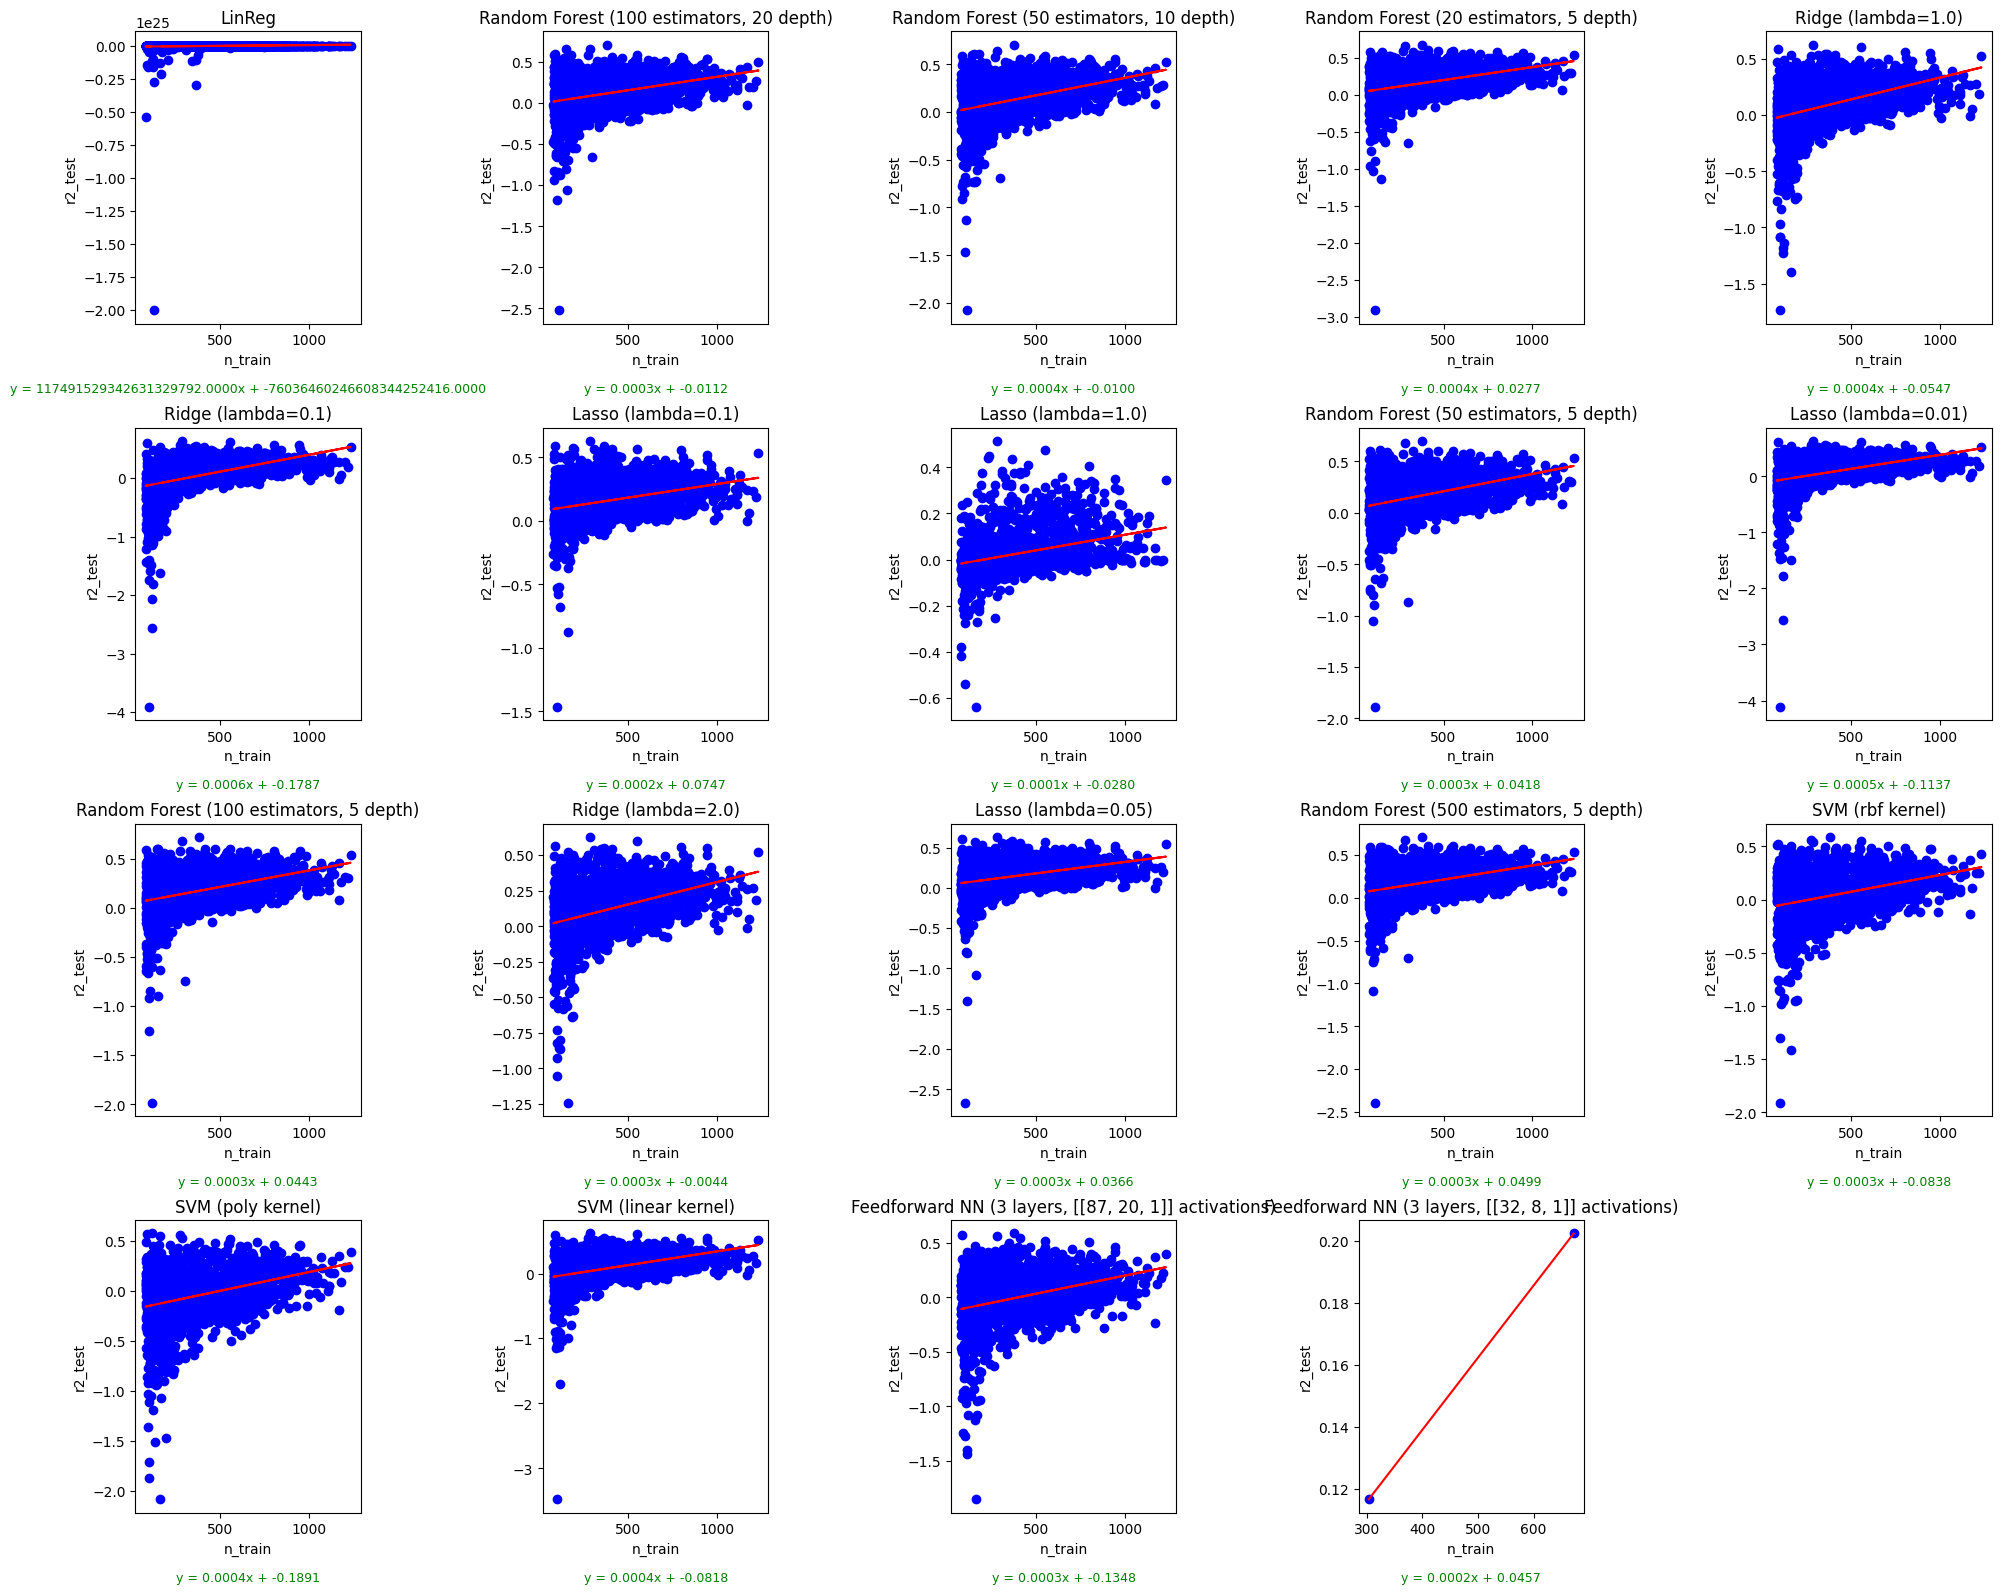

In [44]:
# Determine layout
models = combined_df['Model'].unique()
fig, axs = plt.subplots(4, 5, figsize=(20, 16))  # Adjust the figsize as needed
axs = axs.flatten()  # Flatten the axis array

# Plotting with modifications
for i, model in enumerate(models):
    model_df = combined_df[combined_df['Model'] == model]
    # Plot points
    axs[i].scatter(model_df['n_train'], model_df['r2_test'], color='blue')
    
    # Best-fit line and equation
    if not model_df.empty:
        x = model_df['n_train']
        y = model_df['r2_test']
        m, b = np.polyfit(x, y, 1)  # Linear fit
        axs[i].plot(x, m*x + b, color='red')  # Add the best-fit line
        equation_text = f'y = {m:.4f}x + {b:.4f}'
    else:
        equation_text = 'No data'

    # Set title with model and below add equation text
    axs[i].set_title(f'{model}')
    axs[i].set_xlabel('n_train')
    axs[i].set_ylabel('r2_test')
    axs[i].text(0.5, -0.2, equation_text, transform=axs[i].transAxes, ha="center", va="top", fontsize=9, color="green")

# Hide unused subplots
for ax in axs[len(models):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
### TOP MODELS Analysis

In [32]:
dfs = {}
for name in os.listdir('./player_game_logs'):
    dfs[name] = pd.read_csv(f"./player_game_logs/{name}/{name}_SUMMARY.csv")

# Step 1: Combine the DataFrames
data = []
for player, df in dfs.items():
    df_copy = df.copy()
    df_copy.insert(0, 'player_name', player)
    data.append(df_copy)
combined_df = pd.concat(data)

# Step 2 and 3: Group by ModelType, sort by r2_test, and get top 10 for each group
top_models_per_type = combined_df.groupby('model_type').apply(lambda x: x.sort_values('r2_test', ascending=False).head(10))

# Reset index if you want a cleaner DataFrame
top_models_per_type = top_models_per_type.reset_index(drop=True)

In [34]:
top_models_per_type['model_type'].unique()

array(['Feedforward NN (3 layers, [[32, 16, 1]] activations)',
       'Feedforward NN (3 layers, [[87, 20, 1]] activations)',
       'Lasso (lambda=0.01)', 'Lasso (lambda=0.05)', 'Lasso (lambda=0.1)',
       'Lasso (lambda=1.0)', 'LinReg',
       'Random Forest (100 estimators, 20 depth)',
       'Random Forest (100 estimators, 5 depth)',
       'Random Forest (20 estimators, 5 depth)',
       'Random Forest (50 estimators, 10 depth)',
       'Random Forest (50 estimators, 5 depth)',
       'Random Forest (500 estimators, 5 depth)', 'Ridge (lambda=0.1)',
       'Ridge (lambda=1.0)', 'Ridge (lambda=2.0)', 'SVM (linear kernel)',
       'SVM (poly kernel)', 'SVM (rbf kernel)'], dtype=object)

In [37]:
model = 'Random Forest (500 estimators, 5 depth)'
top_models_per_type[top_models_per_type['model_type'] == model]

,player_name,model_type,n_train,n_test,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test,y_test_mean,bias,Game of season_weight,Game for player_weight,Age (days)_weight,Home?_weight,Game Started?_weight,Year_weight,Month of Season_weight,Team_GSW_weight,Opponent_GSW_weight,Team_DET_weight,Opponent_DET_weight,Team_WSB_weight,Opponent_WSB_weight,Team_LAC_weight,Opponent_LAC_weight,Team_DAL_weight,Opponent_DAL_weight,Team_BOS_weight,Opponent_BOS_weight,Team_MEM_weight,Opponent_MEM_weight,Team_UTA_weight,Opponent_UTA_weight,Team_MIN_weight,Opponent_MIN_weight,Team_NJN_weight,Opponent_NJN_weight,Team_TOR_weight,Opponent_TOR_weight,Team_BRK_weight,Opponent_BRK_weight,Team_DEN_weight,Opponent_DEN_weight,Team_WAS_weight,Opponent_WAS_weight,Team_PHI_weight,Opponent_PHI_weight,Team_POR_weight,Opponent_POR_weight,Team_IND_weight,Opponent_IND_weight,Team_MIL_weight,Opponent_MIL_weight,Team_SAC_weight,Opponent_SAC_weight,Team_ATL_weight,Opponent_ATL_weight,Team_ORL_weight,Opponent_ORL_weight,Team_VAN_weight,Opponent_VAN_weight,Team_OKC_weight,Opponent_OKC_weight,Team_LAL_weight,Opponent_LAL_weight,Team_SDC_weight,Opponent_SDC_weight,Team_NOH_weight,Opponent_NOH_weight,Team_NYK_weight,Opponent_NYK_weight,Team_CHH_weight,Opponent_CHH_weight,Team_SEA_weight,Opponent_SEA_weight,Team_NOP_weight,Opponent_NOP_weight,Team_NOK_weight,Opponent_NOK_weight,Team_PHO_weight,Opponent_PHO_weight,Team_CHA_weight,Opponent_CHA_weight,Team_MIA_weight,Opponent_MIA_weight,Team_CLE_weight,Opponent_CLE_weight,Team_CHO_weight,Opponent_CHO_weight,Team_CHI_weight,Opponent_CHI_weight,Team_SAS_weight,Opponent_SAS_weight,Team_KCK_weight,Opponent_KCK_weight,Team_HOU_weight,Opponent_HOU_weight
120,pervis_ellison,"Random Forest (500 estimators, 5 depth)",379,95,15.9707,3.9963,0.7475,17.3190,4.1616,0.7088,9.2947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,shai_gilgeous-alexander,"Random Forest (500 estimators, 5 depth)",284,72,27.5146,5.2454,0.7250,36.3223,6.0268,0.6756,22.1944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,pascal_siakam,"Random Forest (500 estimators, 5 depth)",412,103,35.6728,5.9727,0.6446,36.5861,6.0486,0.6019,16.6990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,tony_campbell,"Random Forest (500 estimators, 5 depth)",552,138,26.2260,5.1211,0.6754,33.9401,5.8258,0.6004,10.3261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,danny_granger,"Random Forest (500 estimators, 5 depth)",468,118,34.2496,5.8523,0.6031,35.0011,5.9162,0.5987,15.7373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [51]:
nj_test = pd.read_csv('./player_game_logs/nikola_jokić/nikola_jokić_SUMMARY.csv')
nj_test

,model_type,n_train,n_test,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test,y_test_mean,bias,Game of season_weight,Game for player_weight,Age (days)_weight,Home?_weight,Game Started?_weight,Year_weight,Month of Season_weight,Team_GSW_weight,Opponent_GSW_weight,Team_DET_weight,Opponent_DET_weight,Team_WSB_weight,Opponent_WSB_weight,Team_LAC_weight,Opponent_LAC_weight,Team_DAL_weight,Opponent_DAL_weight,Team_BOS_weight,Opponent_BOS_weight,Team_MEM_weight,Opponent_MEM_weight,Team_UTA_weight,Opponent_UTA_weight,Team_MIN_weight,Opponent_MIN_weight,Team_NJN_weight,Opponent_NJN_weight,Team_TOR_weight,Opponent_TOR_weight,Team_BRK_weight,Opponent_BRK_weight,Team_DEN_weight,Opponent_DEN_weight,Team_WAS_weight,Opponent_WAS_weight,Team_PHI_weight,Opponent_PHI_weight,Team_POR_weight,Opponent_POR_weight,Team_IND_weight,Opponent_IND_weight,Team_MIL_weight,Opponent_MIL_weight,Team_SAC_weight,Opponent_SAC_weight,Team_ATL_weight,Opponent_ATL_weight,Team_ORL_weight,Opponent_ORL_weight,Team_VAN_weight,Opponent_VAN_weight,Team_OKC_weight,Opponent_OKC_weight,Team_LAL_weight,Opponent_LAL_weight,Team_SDC_weight,Opponent_SDC_weight,Team_NOH_weight,Opponent_NOH_weight,Team_NYK_weight,Opponent_NYK_weight,Team_CHH_weight,Opponent_CHH_weight,Team_SEA_weight,Opponent_SEA_weight,Team_NOP_weight,Opponent_NOP_weight,Team_NOK_weight,Opponent_NOK_weight,Team_PHO_weight,Opponent_PHO_weight,Team_CHA_weight,Opponent_CHA_weight,Team_MIA_weight,Opponent_MIA_weight,Team_CLE_weight,Opponent_CLE_weight,Team_CHO_weight,Opponent_CHO_weight,Team_CHI_weight,Opponent_CHI_weight,Team_SAS_weight,Opponent_SAS_weight,Team_KCK_weight,Opponent_KCK_weight,Team_HOU_weight,Opponent_HOU_weight
0,LinReg,512,129,58.8310,7.6701,0.3720,82.8368,9.1015,0.0469,20.1860,"12,497,418,548,847.5078",20.9092,-23.7540,-4.0789,1.0502,3.4358,22.0593,5.6735,"-4,332,197,787,991.6719","-12,497,418,548,842.1152","-1,099,458,572,387.2656","-12,497,418,548,844.6074","63,897,114,120.9044","-1,420,940,007,888.2644","-181,472,142,778.4552","-12,497,418,548,839.0957","-15,174,836,354.6695","-12,497,418,548,843.0938","2,850,458,281.3208","-12,497,418,548,840.4473","-136,188,322.0345","-12,497,418,548,842.3555","-2,182,319.3007","-12,497,418,548,840.9023","-208,879.9205","-12,497,418,548,840.1504","4,213.4438","5,152.7226",-450.8984,"-12,497,418,548,839.6504",6.4750,"-12,497,418,548,840.3262",-0.0527,0.0000,0.0000,"-12,497,418,548,838.3594",0.0000,"-12,497,418,548,840.9082",0.0000,"-12,497,418,548,840.5234",0.0000,"-12,497,418,548,835.2520",0.0000,"-12,497,418,548,837.1406",0.0000,"-12,497,418,548,840.5234",0.0000,"-12,497,418,548,841.2246",0.0000,"-12,497,418,548,842.3711",0.0000,0.0000,0.0000,"-12,497,418,548,837.2031",0.0000,"-12,497,418,548,840.0859",0.0000,0.0000,0.0000,0.0000,0.0000,"-12,497,418,548,837.3887",0.0000,0.0000,0.0000,0.0000,0.0000,"-12,497,418,548,838.2480",0.0000,0.0000,0.0000,"-12,497,418,548,838.2695",0.0000,0.0000,0.0000,"-12,497,418,548,839.6914",0.0000,"-12,497,418,548,842.9844",0.0000,"-12,497,418,548,841.7871",0.0000,"-12,497,418,548,844.9219",0.0000,"-12,497,418,548,837.0703",0.0000,0.0000,0.0000,"-12,497,418,548,841.2285"
1,Lasso,512,129,78.8009,8.8770,0.1588,73.9699,8.6006,0.1489,20.1860,17.8896,0.0000,0.0000,5.8892,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000
2,"Random Forest (100 estimators, 20 depth)",512,129,10.7012,3.2713,0.8858,72.6531,8.5237,0.1641,20.1860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [45]:
ds = pd.read_csv('./player_game_logs/derek_strong/derek_strong_SUMMARY.csv')
ds.sort_values('r2_test', ascending=False)

,model_type,n_train,n_test,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test,y_test_mean,bias,Game of season_weight,Game for player_weight,Age (days)_weight,Home?_weight,Game Started?_weight,Year_weight,Month of Season_weight,Team_GSW_weight,Opponent_GSW_weight,Team_DET_weight,Opponent_DET_weight,Team_WSB_weight,Opponent_WSB_weight,Team_LAC_weight,Opponent_LAC_weight,Team_DAL_weight,Opponent_DAL_weight,Team_BOS_weight,Opponent_BOS_weight,Team_MEM_weight,Opponent_MEM_weight,Team_UTA_weight,Opponent_UTA_weight,Team_MIN_weight,Opponent_MIN_weight,Team_NJN_weight,Opponent_NJN_weight,Team_TOR_weight,Opponent_TOR_weight,Team_BRK_weight,Opponent_BRK_weight,Team_DEN_weight,Opponent_DEN_weight,Team_WAS_weight,Opponent_WAS_weight,Team_PHI_weight,Opponent_PHI_weight,Team_POR_weight,Opponent_POR_weight,Team_IND_weight,Opponent_IND_weight,Team_MIL_weight,Opponent_MIL_weight,Team_SAC_weight,Opponent_SAC_weight,Team_ATL_weight,Opponent_ATL_weight,Team_ORL_weight,Opponent_ORL_weight,Team_VAN_weight,Opponent_VAN_weight,Team_OKC_weight,Opponent_OKC_weight,Team_LAL_weight,Opponent_LAL_weight,Team_SDC_weight,Opponent_SDC_weight,Team_NOH_weight,Opponent_NOH_weight,Team_NYK_weight,Opponent_NYK_weight,Team_CHH_weight,Opponent_CHH_weight,Team_SEA_weight,Opponent_SEA_weight,Team_NOP_weight,Opponent_NOP_weight,Team_NOK_weight,Opponent_NOK_weight,Team_PHO_weight,Opponent_PHO_weight,Team_CHA_weight,Opponent_CHA_weight,Team_MIA_weight,Opponent_MIA_weight,Team_CLE_weight,Opponent_CLE_weight,Team_CHO_weight,Opponent_CHO_weight,Team_CHI_weight,Opponent_CHI_weight,Team_SAS_weight,Opponent_SAS_weight,Team_KCK_weight,Opponent_KCK_weight,Team_HOU_weight,Opponent_HOU_weight
13,"Random Forest (500 estimators, 5 depth)",364,92,16.2523,4.0314,0.5036,21.9609,4.6862,0.3483,6.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Random Forest (50 estimators, 5 depth)",364,92,16.1892,4.0236,0.5055,22.2285,4.7147,0.3403,6.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,"Random Forest (100 estimators, 5 depth)",364,92,16.4756,4.0590,0.4968,22.2489,4.7169,0.3397,6.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Random Forest (100 estimators, 20 depth)",364,92,4.0261,2.0065,0.8770,22.7044,4.7649,0.3262,6.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Random Forest (50 estimators, 10 depth)",364,92,7.1119,2.6668,0.7828,22.9717,4.7929,0.3183,6.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Random Forest (20 estimators, 5 depth)",364,92,16.6164